## 3. 센서 정상 동작 테스트

> 아래 코드들을 jupyter notebook에서 입력하며 센서가 정상적으로 동작하는지 확인해보자.(코드는 pinky 폴더 내에 pinky_test.ipynb 형식으로도 들어있다.)

### 1) 부저

부저가 3번 울리는지 확인

In [1]:
from pinkylib import Buzzer

pinky = Buzzer()
pinky.buzzer_start()
pinky.buzzer(3)
pinky.buzzer_stop()
pinky.clean()

### 2) 초음파 센서

초음파 센서 앞에 손이나 물건을 갖다대며 값이 정상적으로 출력되는지 확인

In [2]:
from pinkylib import Ultrasonic
import time

pinky = Ultrasonic()

for i in range(5):
    dist = pinky.get_dist()
    print(f"{dist:.2f} cm")
    time.sleep(0.5)
    
pinky.clean()

14.43 cm
14.44 cm
14.34 cm
14.27 cm
14.41 cm


### 3) IR 센서

흰 물체와 검은색 물체를 두고 왔다갔다 하며 ir센서가 정상적으로 출력되는지 확인
- 흰색 부분은 1 출력
- 검은색 부분은 0 출력

In [3]:
from pinkylib import IR
import time

pinky = IR()

for i in range(10):
    ir_1, ir_2, ir_3 = pinky.read_ir()
    print(f"ir_1: {ir_1}, ir_2: {ir_2}, ir_3: {ir_3}")
    time.sleep(0.5)
    
pinky.clean()

ir_1: 0, ir_2: 1, ir_3: 1
ir_1: 0, ir_2: 1, ir_3: 1
ir_1: 0, ir_2: 1, ir_3: 1
ir_1: 0, ir_2: 0, ir_3: 0
ir_1: 0, ir_2: 0, ir_3: 0
ir_1: 0, ir_2: 0, ir_3: 0
ir_1: 0, ir_2: 0, ir_3: 0
ir_1: 0, ir_2: 0, ir_3: 0
ir_1: 0, ir_2: 0, ir_3: 0
ir_1: 0, ir_2: 0, ir_3: 0


### 4) IMU 센서

로봇을 좌우로 기울이면서 센서값이 바뀌는지 확인

In [4]:
from pinkylib import IMU
import time

imu = IMU()

try:
    for i in range(10):
        imu_data = imu.read_imu()
        print(f"Magnetometer: X: {imu_data["x"]:.2f} Y: {imu_data["y"]:.2f} Z: {imu_data["z"]:.2f}")
        print(f"Accelerometer: Ax={imu_data["ax"]:.2f}, Ay={imu_data["ay"]:.2f}, Az={imu_data["az"]:.2f}")
        print(f"Gyroscope: Gx={imu_data["gx"]:.2f}, Gy={imu_data["gy"]:.2f}, Gz={imu_data["gz"]:.2f}")
        print("----")
            
        time.sleep(0.5)

except KeyboardInterrupt:
    print("Process stopped by user")

Magnetometer: X: -17.85 Y: -46.65 Z: 12.90
Accelerometer: Ax=0.02, Ay=0.01, Az=1.01
Gyroscope: Gx=-0.10, Gy=-0.85, Gz=0.15
----
Magnetometer: X: -16.95 Y: -47.70 Z: 14.10
Accelerometer: Ax=0.02, Ay=0.01, Az=1.01
Gyroscope: Gx=0.25, Gy=-0.92, Gz=0.25
----
Magnetometer: X: -15.45 Y: -48.75 Z: 14.10
Accelerometer: Ax=0.02, Ay=0.01, Az=1.01
Gyroscope: Gx=0.31, Gy=-0.63, Gz=-0.05
----
Magnetometer: X: -14.25 Y: -49.05 Z: 17.55
Accelerometer: Ax=0.01, Ay=0.03, Az=1.04
Gyroscope: Gx=-54.93, Gy=53.00, Gz=-15.47
----
Magnetometer: X: -13.95 Y: -49.95 Z: 30.30
Accelerometer: Ax=-0.30, Ay=-0.43, Az=0.85
Gyroscope: Gx=-10.48, Gy=2.32, Gz=-3.45
----
Magnetometer: X: -14.25 Y: -47.85 Z: 22.95
Accelerometer: Ax=-0.11, Ay=-0.09, Az=1.00
Gyroscope: Gx=30.56, Gy=-33.79, Gz=-4.39
----
Magnetometer: X: -14.70 Y: -43.20 Z: 12.00
Accelerometer: Ax=0.05, Ay=0.07, Az=1.00
Gyroscope: Gx=69.88, Gy=19.85, Gz=24.45
----
Magnetometer: X: -15.30 Y: -46.65 Z: 12.45
Accelerometer: Ax=0.00, Ay=0.15, Az=1.00
Gyroscope:

### 5) 모터

로봇이 전진하는지 확인

- 추가적으로 move 안에 숫자를 바꿔보면서 회전 방향이 맞는지도 테스트(음수 값을 넣으면 후진)

- 예) pinky.move(30, 40) 일 경우 좌회전 하는지 확인

In [5]:
from pinkylib import Motor
import time

pinky = Motor()
pinky.enable_motor()
pinky.start_motor()

pinky.move(30, 30)
time.sleep(2)
pinky.stop()

pinky.disable_motor()
pinky.stop_motor()
pinky.clean()

### 6) 카메라

카메라가 잘 출력되는지 확인

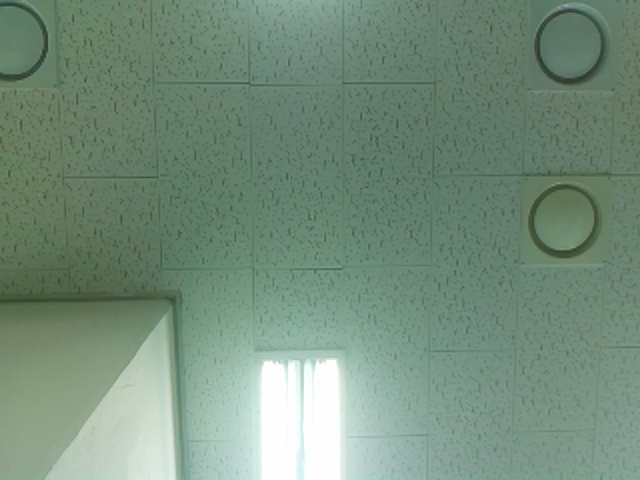

In [6]:
from pinkylib import Camera # 카메라 모듈 불러오기

cam = Camera() # Camera 객체 생성
cam.start() # 카메라 시작

cam.play_jupyter(5)

cam.close()

### 7) 배터리

배터리 값이 출력되는지 확인
- 충전중에 동작할경우 부정확한 값이 출력, 충전기 제거 후 확인하기

In [9]:
from pinkylib import Battery

battery = Battery()

print(battery.get_battery())

battery.clean()

89.8


### 8) LCD

LCD에 초록색 화면이 뜨는지 확인

In [1]:
from pinky_lcd import LCD
from PIL import Image
import time

lcd = LCD()

img_width, img_height = 320, 240
background_color = (0, 255, 0)
text_color = (0, 255, 0)

img = Image.new('RGB', (img_width, img_height), color=background_color)

lcd.img_show(img)

time.sleep(3)

lcd.clear()
#lcd.close()